In [132]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/home-price/data_description.txt
/kaggle/input/home-price/train.csv
/kaggle/input/home-price/test.csv


# **기본 설정**

In [133]:
# 라이브러리 설치
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from scipy import stats

In [134]:
# plot 초기 설정
sns.set_style('darkgrid')
sns.set_palette('pastel')

In [135]:
# 데이터 불러오기
train_df = pd.read_csv('../input/home-price/train.csv')

In [136]:
# 경고 메시지 무시 
import warnings
warnings.filterwarnings(action='ignore')

# **데이터 확인**

In [137]:
# 데이터 정보 확인
    # dtypes: float64(3), int64(35), object(43)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [138]:
train_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [139]:
train_df.describe(include='O')

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


In [140]:
missing

Electrical         1
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
BsmtExposure      38
BsmtFinType2      38
GarageCond        81
GarageQual        81
GarageFinish      81
GarageYrBlt       81
GarageType        81
LotFrontage      259
FireplaceQu      690
MasVnrType       872
Fence           1179
Alley           1369
MiscFeature     1406
PoolQC          1453
dtype: int64

<missing data>
Electrical         1
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
BsmtExposure      38
BsmtFinType2      38
GarageCond        81
GarageQual        81
GarageFinish      81
GarageYrBlt       81
GarageType        81
LotFrontage      259
FireplaceQu      690
MasVnrType       872
Fence           1179
Alley           1369
MiscFeature     1406
PoolQC          1453
dtype: int64


<Axes: >

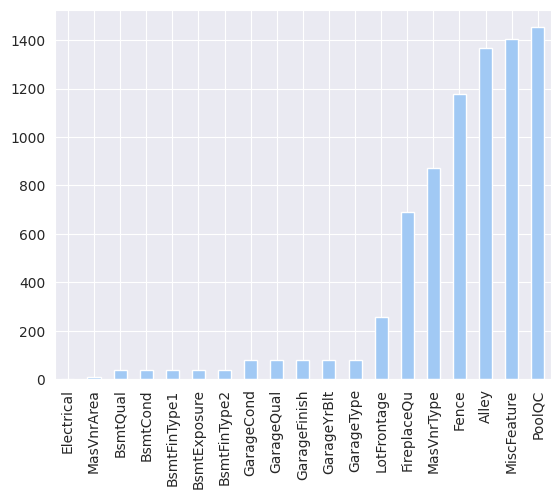

In [141]:
# 결측값 확인
missing = train_df.isnull().sum()
missing = missing[missing>0]
missing.sort_values(inplace=True)

print(f'<missing data>\n{missing}')

missing.plot.bar()

# **데이터 분리**

In [142]:
# 수치형 & 범주형 데이터 분리 
numerical = train_df.select_dtypes(exclude='object')
numerical_col = numerical.columns

categorical = train_df.select_dtypes(include='object')
categorical_col = categorical.columns

# 
print(f'{numerical.columns}\n\n{categorical.columns}')

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 

# **데이터 형태 확인 및 변환**

In [143]:
# HomePrice dataset 왜도 첨도 파악
    # 한쪽으로 치우친 데이터가 여럿 확인되나, 
    # 본 파일에서는 SalePrice에 한해 데이터 변환을 시행 

for col in numerical_col:
    print('{:15}'.format(col),
          'Skewness: {:05.2f}'.format(train_df[col].skew()),
          '   ',
          'Kurtosis: {:06.2f}'.format(train_df[col].kurt())
         )    

Id              Skewness: 00.00     Kurtosis: -01.20
MSSubClass      Skewness: 01.41     Kurtosis: 001.58
LotFrontage     Skewness: 02.16     Kurtosis: 017.45
LotArea         Skewness: 12.21     Kurtosis: 203.24
OverallQual     Skewness: 00.22     Kurtosis: 000.10
OverallCond     Skewness: 00.69     Kurtosis: 001.11
YearBuilt       Skewness: -0.61     Kurtosis: -00.44
YearRemodAdd    Skewness: -0.50     Kurtosis: -01.27
MasVnrArea      Skewness: 02.67     Kurtosis: 010.08
BsmtFinSF1      Skewness: 01.69     Kurtosis: 011.12
BsmtFinSF2      Skewness: 04.26     Kurtosis: 020.11
BsmtUnfSF       Skewness: 00.92     Kurtosis: 000.47
TotalBsmtSF     Skewness: 01.52     Kurtosis: 013.25
1stFlrSF        Skewness: 01.38     Kurtosis: 005.75
2ndFlrSF        Skewness: 00.81     Kurtosis: -00.55
LowQualFinSF    Skewness: 09.01     Kurtosis: 083.23
GrLivArea       Skewness: 01.37     Kurtosis: 004.90
BsmtFullBath    Skewness: 00.60     Kurtosis: -00.84
BsmtHalfBath    Skewness: 04.10     Kurtosis: 

Skewness: 0.12
Kurtosis: 0.81


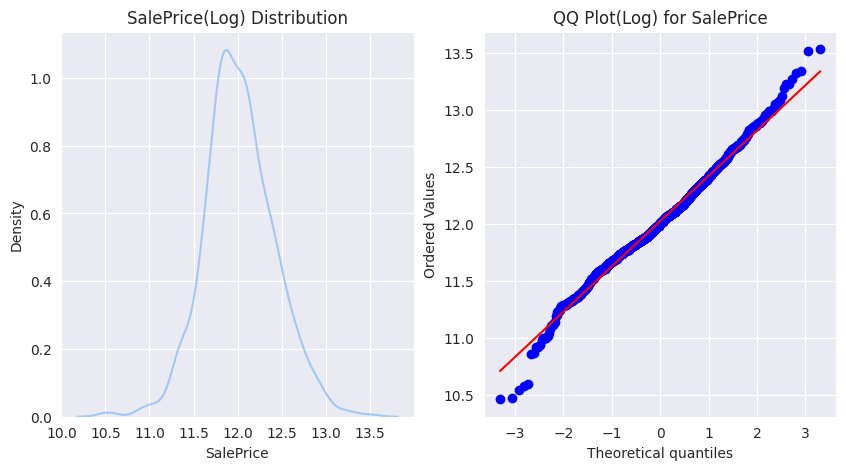

In [144]:
# SalePrice 데이터 변환

# log 변환 
train_df['SalePrice'] = np.log1p(train_df['SalePrice'])

# subplots 설정
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

# SalePrice kdeplot 
# sns.distplot(train_df['SalePrice'], kde=True, ax=ax1)
sns.kdeplot(train_df['SalePrice'], ax=ax1)
ax1.set_title('SalePrice(Log) Distribution')

# SalePrice QQ-Plot 
stats.probplot(train_df['SalePrice'], dist='norm', plot=plt)
plt.title('QQ Plot(Log) for SalePrice')

# SalePrice Skew & Kurt
print(f"Skewness: {train_df['SalePrice'].skew():.2f}") 
# 왜도 = -0.06 (Skew<0,  mid < mean)
print(f"Kurtosis: {train_df['SalePrice'].kurt():.2f}") 
# 첨도 = 0.94 (Kurt<3, Platykurtic)


# **데이터 시각화**

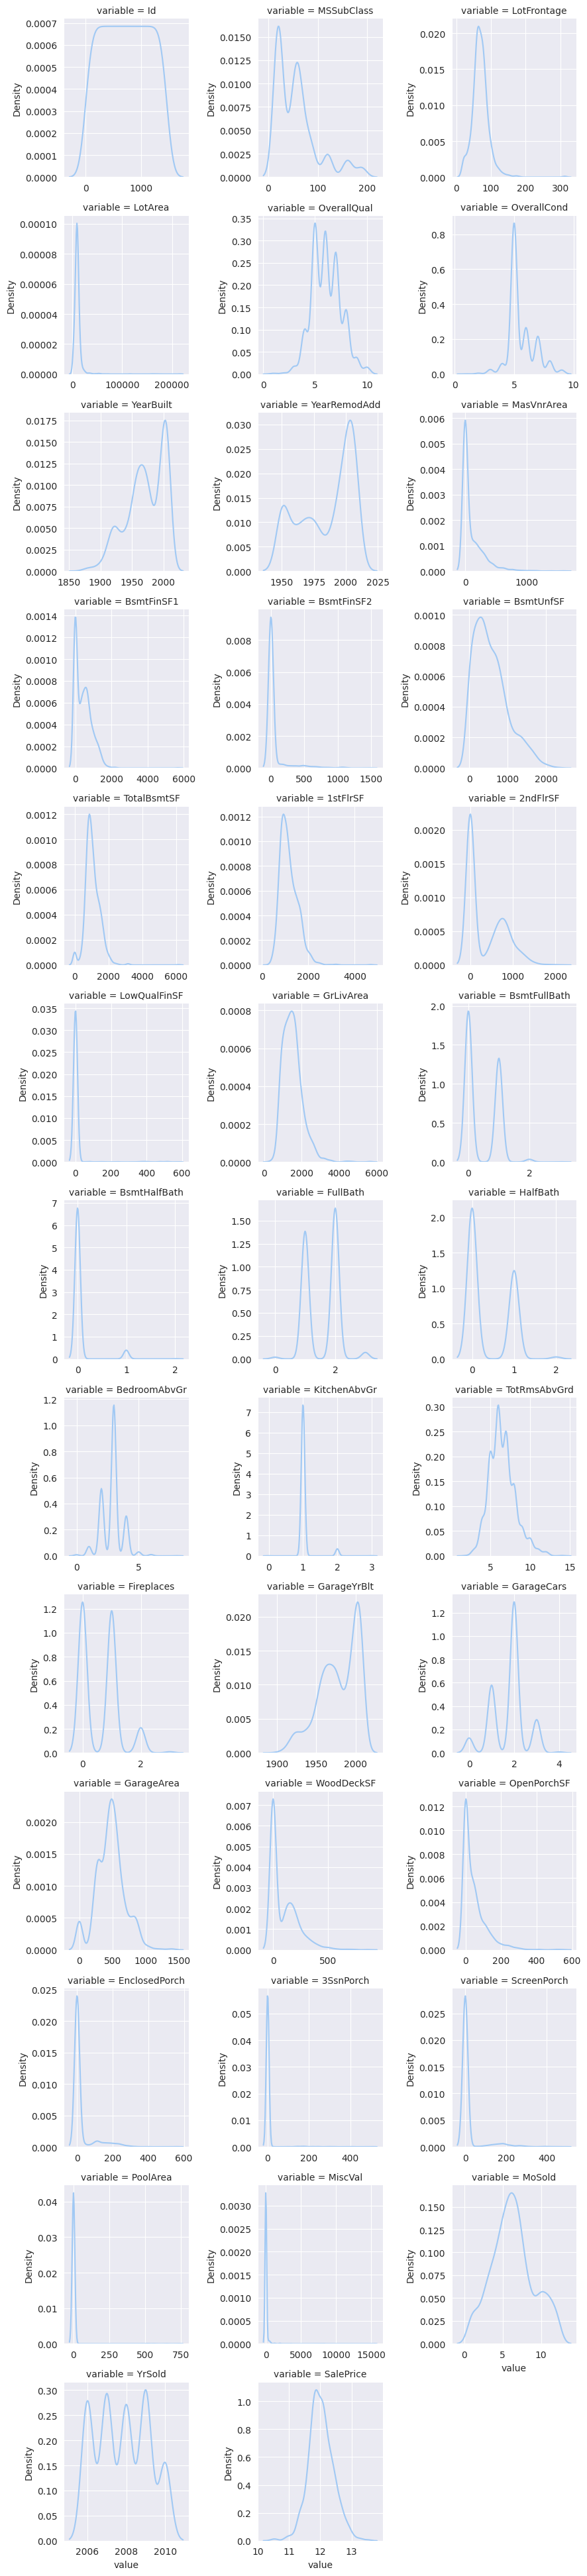

In [145]:
# Numerical data 시각화(kdeplot)
f = pd.melt(train_df, value_vars=numerical)
g = sns.FacetGrid(f, col='variable', col_wrap=3, sharex=False, sharey=False)

g = g.map(sns.kdeplot, 'value')

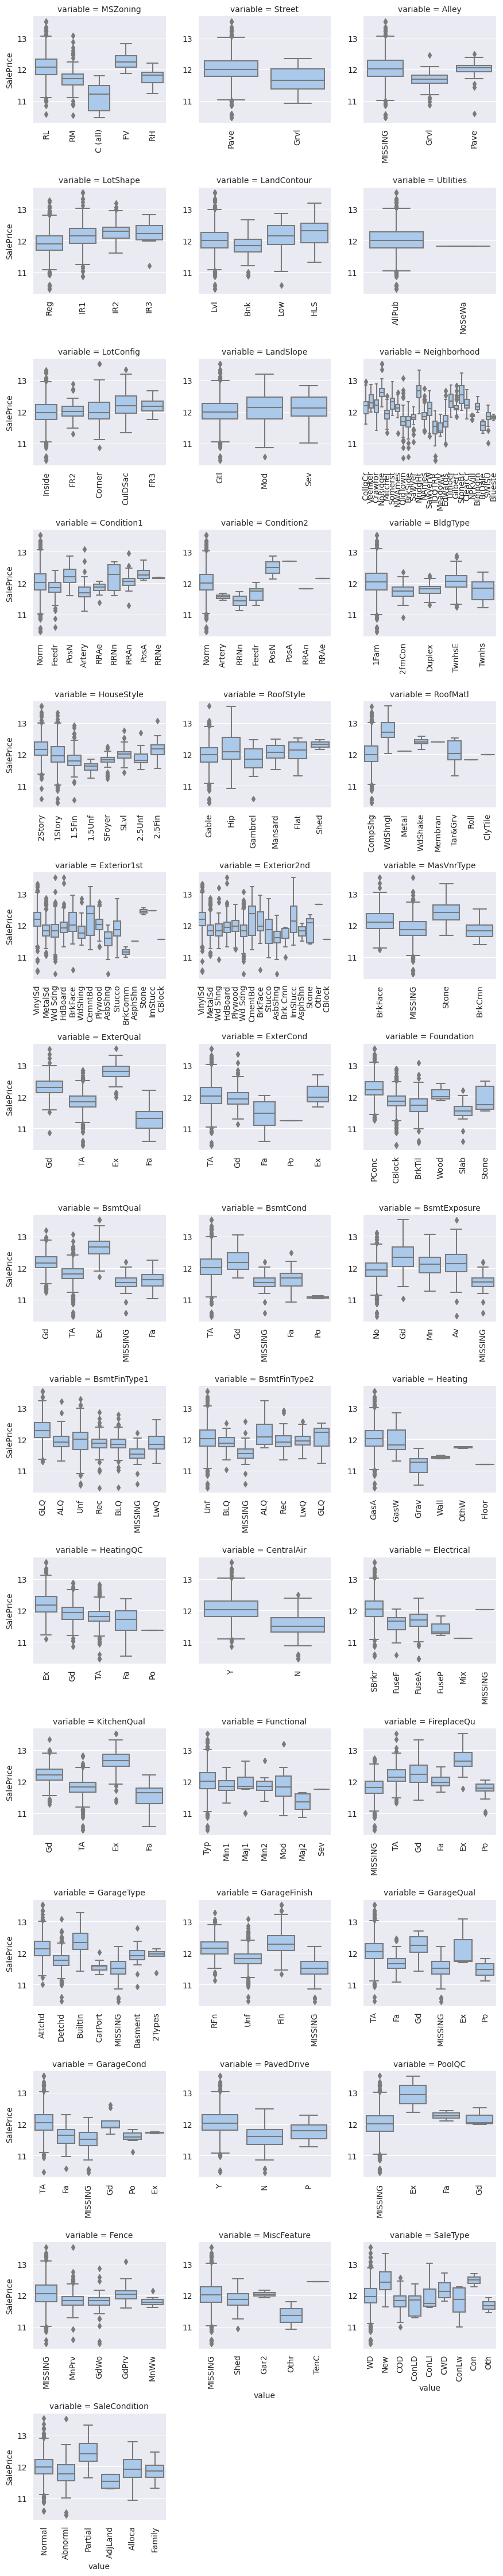

In [146]:
# Categorical data 시각화(Boxplot)
for c in categorical_col:
    train_df[c] = train_df[c].astype('category')
    if train_df[c].isnull().any():
        train_df[c] = train_df[c].cat.add_categories(['MISSING'])
        train_df[c] = train_df[c].fillna('MISSING')
        
def boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
#     x=plt.xticks(rotation=90)
    

f = pd.melt(train_df, id_vars=['SalePrice'], value_vars=categorical_col)
g = sns.FacetGrid(f, col='variable', col_wrap=3, sharex=False, sharey=False)

g = g.map(sns.boxplot, 'value', 'SalePrice')
g.set_xticklabels(rotation=90)

plt.tight_layout()
plt.show()

# **데이터 전처리**

In [147]:
# 상관관계 정도에 따른 분리(numerical)
# train_df.corr() 및 abs 처리
train_corr = numerical.corr()
train_corr_abs = train_corr.abs()

# 변수 선택
train_corr_num_cols = len(numerical_col)
# 상관관계 절댓값 행렬에서 'SalePrice' 열과의 상관관계 값 추출
series_corr = train_corr_abs['SalePrice'].nlargest(train_corr_num_cols)

# 상관계수 최솟값 지정 
min_val_corr=0.4

# 상관관계에 따른 분류 진행 
num_strong_corr = list(series_corr[series_corr.values>min_val_corr].index)
num_weak_corr = list(series_corr[series_corr.values<=min_val_corr].index)

print(f"train_numerical with r above min_var_corr: \n{num_strong_corr}")
print('-'*80)
print(f"train_numerical with r below min_var_corr: \n{num_weak_corr}")

train_numerical with r above min_var_corr: 
['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'MasVnrArea', 'Fireplaces']
--------------------------------------------------------------------------------
train_numerical with r below min_var_corr: 
['BsmtFinSF1', 'LotFrontage', 'WoodDeckSF', '2ndFlrSF', 'OpenPorchSF', 'HalfBath', 'LotArea', 'BsmtFullBath', 'BsmtUnfSF', 'BedroomAbvGr', 'KitchenAbvGr', 'EnclosedPorch', 'ScreenPorch', 'PoolArea', 'MSSubClass', 'OverallCond', 'MoSold', '3SsnPorch', 'YrSold', 'LowQualFinSF', 'Id', 'MiscVal', 'BsmtHalfBath', 'BsmtFinSF2']


In [148]:
# 상관관계 정도에 따른 분리(train_categorical)
catg_strong_corr = [ 'MSZoning', 'Neighborhood', 'Condition2', 'MasVnrType', 'ExterQual', 
                     'BsmtQual','CentralAir', 'Electrical', 'KitchenQual', 'SaleType']

catg_weak_corr = ['Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 
                  'LandSlope', 'Condition1',  'BldgType', 'HouseStyle', 'RoofStyle', 
                  'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterCond', 'Foundation', 
                  'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 
                  'HeatingQC', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 
                  'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 
                  'SaleCondition' ]

In [149]:
# 'MSZoning'
msz_catg2 = ['RM', 'RH']
msz_catg3 = ['RL', 'FV'] 

# Neighborhood
nbhd_catg2 = ['Blmngtn', 'ClearCr', 'CollgCr', 'Crawfor', 'Gilbert', 'NWAmes', 'Somerst', 'Timber', 'Veenker']
nbhd_catg3 = ['NoRidge', 'NridgHt', 'StoneBr']

# Condition2
cond2_catg2 = ['Norm', 'RRAe']
cond2_catg3 = ['PosA', 'PosN'] 

# SaleType
SlTy_catg1 = ['Oth']
SlTy_catg3 = ['CWD']
SlTy_catg4 = ['New', 'Con']

In [150]:
for df in [train_df]:
    
    df['MSZ_num'] = 1  
    df.loc[(df['MSZoning'].isin(msz_catg2) ), 'MSZ_num'] = 2    
    df.loc[(df['MSZoning'].isin(msz_catg3) ), 'MSZ_num'] = 3        
    
    df['NbHd_num'] = 1       
    df.loc[(df['Neighborhood'].isin(nbhd_catg2) ), 'NbHd_num'] = 2    
    df.loc[(df['Neighborhood'].isin(nbhd_catg3) ), 'NbHd_num'] = 3    

    df['Cond2_num'] = 1       
    df.loc[(df['Condition2'].isin(cond2_catg2) ), 'Cond2_num'] = 2    
    df.loc[(df['Condition2'].isin(cond2_catg3) ), 'Cond2_num'] = 3    
    
    df['Mas_num'] = 1       
    df.loc[(df['MasVnrType'] == 'Stone' ), 'Mas_num'] = 2 
    
    df['ExtQ_num'] = 1       
    df.loc[(df['ExterQual'] == 'TA' ), 'ExtQ_num'] = 2     
    df.loc[(df['ExterQual'] == 'Gd' ), 'ExtQ_num'] = 3     
    df.loc[(df['ExterQual'] == 'Ex' ), 'ExtQ_num'] = 4     
   
    df['BsQ_num'] = 1          
    df.loc[(df['BsmtQual'] == 'Gd' ), 'BsQ_num'] = 2     
    df.loc[(df['BsmtQual'] == 'Ex' ), 'BsQ_num'] = 3     
 
    df['CA_num'] = 0          
    df.loc[(df['CentralAir'] == 'Y' ), 'CA_num'] = 1    

    df['Elc_num'] = 1       
    df.loc[(df['Electrical'] == 'SBrkr' ), 'Elc_num'] = 2 


    df['KiQ_num'] = 1       
    df.loc[(df['KitchenQual'] == 'TA' ), 'KiQ_num'] = 2     
    df.loc[(df['KitchenQual'] == 'Gd' ), 'KiQ_num'] = 3     
    df.loc[(df['KitchenQual'] == 'Ex' ), 'KiQ_num'] = 4      
    
    df['SlTy_num'] = 2       
    df.loc[(df['SaleType'].isin(SlTy_catg1) ), 'SlTy_num'] = 1  
    df.loc[(df['SaleType'].isin(SlTy_catg3) ), 'SlTy_num'] = 3  
    df.loc[(df['SaleType'].isin(SlTy_catg4) ), 'SlTy_num'] = 4  

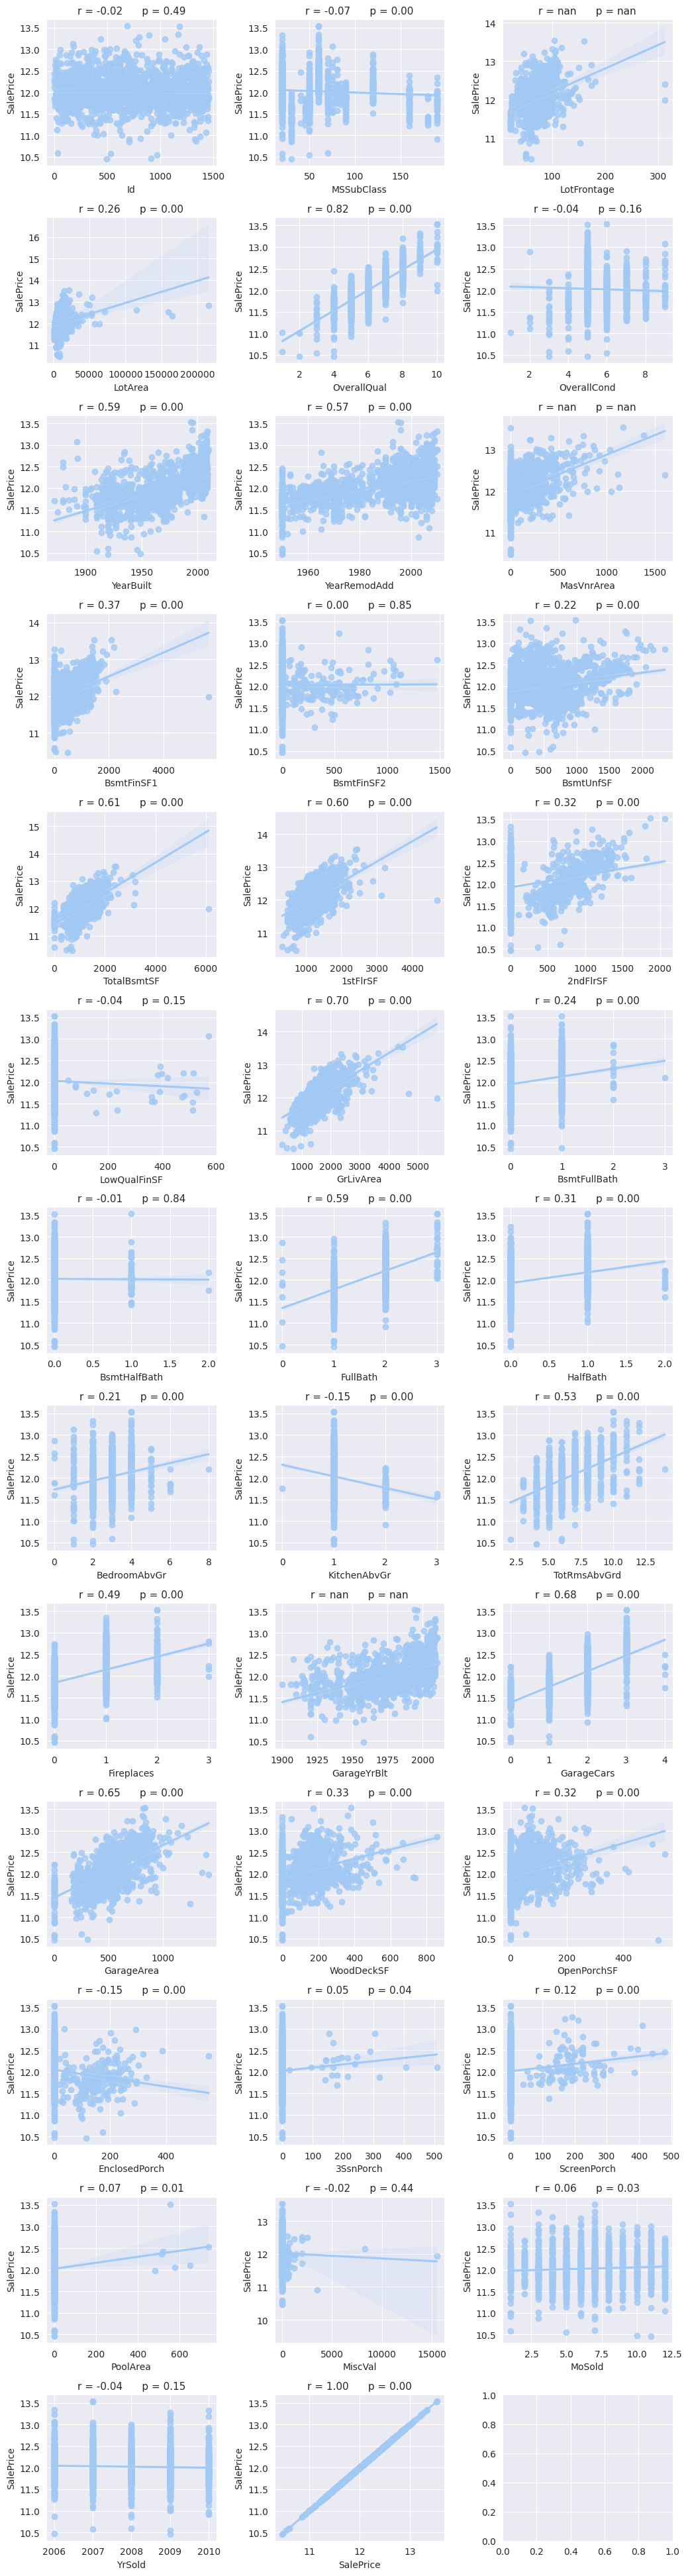

In [151]:
# 시각화 준비
train_num_list = list(numerical_col)
nr_rows=13
nr_cols=3

# subplot 지정
fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*3.5,nr_rows*3))

# X=train_df['Numerical'], Y=SalePrice 
for r in range(0, nr_rows):
    for c in range(0, nr_cols):
        i = r*nr_cols+c
        if i < len(train_num_list):
            sns.regplot(x=train_num_list[i], y=train_df['SalePrice'], data=train_df, ax=axs[r][c])
            stp = stats.pearsonr(train_df[train_num_list[i]], train_df['SalePrice'])
            str_title = "r = " + "{0:.2f}".format(stp[0]) + "      " "p = " + "{0:.2f}".format(stp[1])
            axs[r][c].set_title(str_title,fontsize=11)
            
plt.tight_layout()
plt.show()

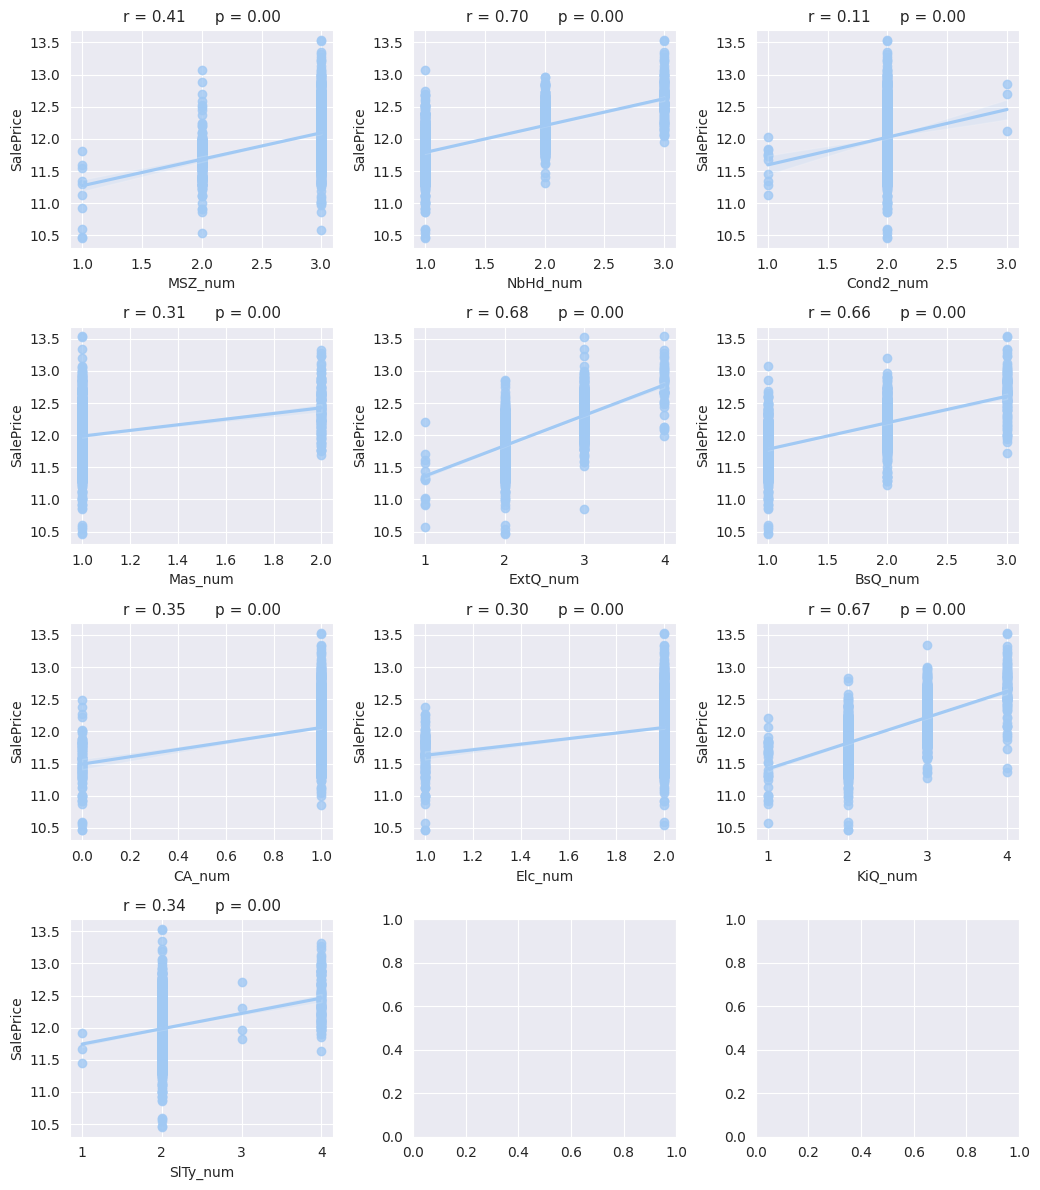

In [152]:
# 신규 컬럼 지정(범주형 변수>숫자형 변수)
new_col_num = ['MSZ_num', 'NbHd_num', 'Cond2_num', 'Mas_num', 'ExtQ_num',
               'BsQ_num', 'CA_num', 'Elc_num', 'KiQ_num', 'SlTy_num']

# 시각화 준비
nr_rows = 4
nr_cols = 3

# subplot 지정
fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*3.5, nr_rows*3))

# # X=train_df['Categorical']>train_df['Numerical'], Y=SalePrice 
for r in range(0, nr_rows):
    for c in range(0, nr_cols):
        i = r*nr_cols+c
        if i < len(new_col_num):
            sns.regplot(x=new_col_num[i], y=train_df['SalePrice'], data=train_df, ax=axs[r][c])
            stp = stats.pearsonr(train_df[new_col_num[i]], train_df['SalePrice'])
            str_title = "r = " + "{0:.2f}".format(stp[0]) + "      " "p = " + "{0:.2f}".format(stp[1])
            axs[r][c].set_title(str_title,fontsize=11)
            
plt.tight_layout()    
plt.show() 

In [153]:
# 약한 상관관계를 가지는 col drop
num_drop = num_weak_corr
catg_drop = catg_weak_corr

cols_drop = num_drop+catg_drop

for df in [train_df]:
    df.drop(cols_drop, inplace=True, axis=1)

In [154]:
# 범주형 데이터 삭제 
catg_cols_to_drop = ['MSZoning','Neighborhood' , 'Condition2', 'MasVnrType', 'ExterQual', 
                     'BsmtQual','CentralAir', 'Electrical', 'KitchenQual', 'SaleType']

for df in [train_df] :
    df.drop(catg_cols_to_drop, inplace= True, axis = 1)

In [155]:
#
train_corr_2 = train_df.corr()
train_corr_abs_2 = train_corr_2.abs()

nr_all_cols = len(train_df)
series_corr_2 = train_corr_abs_2.nlargest(nr_all_cols, 'SalePrice')['SalePrice']

print(series_corr_2)

SalePrice       1.000000
OverallQual     0.817185
GrLivArea       0.700927
NbHd_num        0.696515
GarageCars      0.680625
ExtQ_num        0.678840
KiQ_num         0.667893
BsQ_num         0.659285
GarageArea      0.650888
TotalBsmtSF     0.612134
1stFlrSF        0.596981
FullBath        0.594771
YearBuilt       0.586570
YearRemodAdd    0.565608
GarageYrBlt     0.541073
TotRmsAbvGrd    0.534422
Fireplaces      0.489450
MasVnrArea      0.430809
MSZ_num         0.409404
CA_num          0.351599
SlTy_num        0.335340
Mas_num         0.311370
Elc_num         0.304861
Cond2_num       0.105442
Name: SalePrice, dtype: float64


<Axes: >

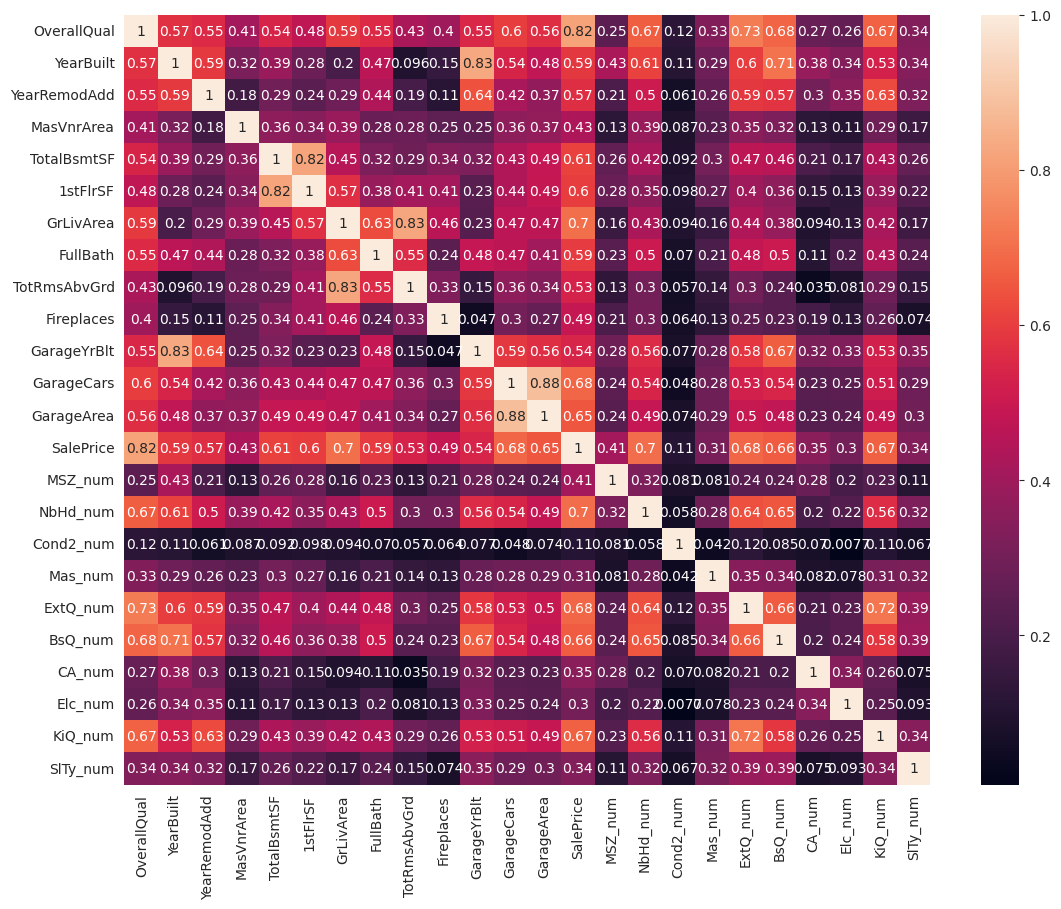

In [156]:
train_corr = train_df.corr()

plt.figure(figsize=(13, 10))
sns.heatmap(data = train_corr, annot=True)